##Loop Concept

In [2]:
from typing import TypedDict,Dict, List
from langgraph.graph import StateGraph, START, END
import random

In [10]:
class AgentState(TypedDict):
    name:str
    number: List[str]=[]
    counter: int

In [11]:
def greeting_node(state:AgentState) -> AgentState:
    state['name'] = f'Hi ! there {state['name']}'
    return state

In [18]:
def random_node(state:AgentState) -> AgentState:
    state['number'].append(random.randint(1,10))
    state['counter']=state['counter']+1
    return state

In [19]:
def should_continue(state:AgentState) -> AgentState:
    if(state['counter'] <= 5):
        return "random"
    else:
        return "exit"

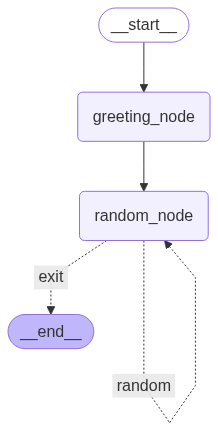

In [24]:
graph = StateGraph(AgentState)
graph.add_edge(START,"greeting_node")
graph.add_node("greeting_node",greeting_node)
graph.add_edge("greeting_node","random_node")
graph.add_node("random_node",random_node)
#graph.add_node("should_contine",lambda agent:agent)
graph.add_conditional_edges("random_node",should_continue,{
    "random":"random_node",
    "exit": END
})
graph.compile()

In [22]:
app = graph.compile(name="Loop Lang graph")
initial_state = AgentState(
    name='Bimal',
    number=[],
    counter=1
)
app.invoke(initial_state)

{'name': 'Hi ! there Bimal', 'number': [4, 3, 4, 2, 2], 'counter': 6}